In [1]:
import torch
from utils import *

In [2]:
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

In [3]:
def mixed_event_difference(i,phase=1.5):
    eventA = importpbdatanumpy(i).T
    eventB = importpbdatanumpy(i+1).T

    phi1 = torch.tensor(eventA[2])
    eta1 = torch.tensor(eventA[1])
    phi2 = torch.tensor(eventB[2])
    eta2 = torch.tensor(eventB[1])

    dphi1 = (phi1 - phi2.unsqueeze(-1)).flatten()
    deta1 = (eta1 - eta2.unsqueeze(-1)).flatten()
    dphi2 = (phi2 - phi1.unsqueeze(-1)).flatten()
    deta2 = (eta2 - eta1.unsqueeze(-1)).flatten()
    dphi = torch.cat([dphi1,dphi2],dim=0)
    deta = torch.cat([deta1,deta2],dim=0)

    pimask = (dphi > (torch.pi+phase))*(-1) + (dphi < (-torch.pi+phase))*1
    dphi += (pimask*2*torch.pi)

    result = torch.stack([dphi,deta],dim=1)
    return result

In [4]:
def calculate_mixed_data(startidx, endidx, phase=1.5, bincount=30, save=False):
    rlist = []
    for i in range(startidx, endidx):
        rlist.append(mixed_event_difference(i,phase))
    result = torch.cat(rlist,dim=0)
    x_df = pd.DataFrame(result, columns=['phi','eta'])
    sx, sy, sz = surfacedatapro(x_df, bincount, bincount, torch.pi+phase, -torch.pi+phase, 5.5)
    sz = sz.T
    if save:
        filename = "mixed/"+str(bincount)+"x"+str(bincount)+"_"+str(startidx)+"to"+str(endidx)+".csv"
        np.savetxt(filename, sz, delimiter=",")
        np.savetxt('mixed/mixed_x_header.csv', sx, delimiter=",")
        np.savetxt('mixed/mixed_y_header.csv', sy, delimiter=",")
    sz/=(endidx-startidx-1)
    return sx, sy, sz

In [5]:
sx,sy,sz = calculate_mixed_data(0,5000,1.5,30)

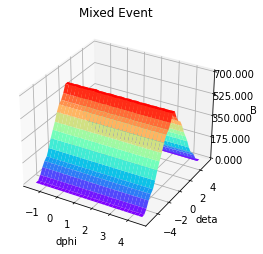

In [8]:
plot_3d_surface(sx, sy, sz, 700, "Mixed Event", "B", "MixedEvent.png")

In [7]:
# phase = 1.5

# eventA = importpbdatanumpy(0).T
# eventB = importpbdatanumpy(1).T

# phi1 = torch.tensor(eventA[2])
# eta1 = torch.tensor(eventA[1])
# phi2 = torch.tensor(eventB[2])
# eta2 = torch.tensor(eventB[1])

# dphi1 = (phi1 - phi2.unsqueeze(-1)).flatten()
# deta1 = (eta1 - eta2.unsqueeze(-1)).flatten()
# dphi2 = (phi2 - phi1.unsqueeze(-1)).flatten()
# deta2 = (eta2 - eta1.unsqueeze(-1)).flatten()
# dphi = torch.cat([dphi1,dphi2],dim=0)
# deta = torch.cat([deta1,deta2],dim=0)

# pimask = (dphi > (torch.pi+phase))*(-1) + (dphi < (-torch.pi+phase))*1
# dphi += (pimask*2*torch.pi)

# result = torch.stack([dphi,deta],dim=1)